In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet, set_log_level
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
set_log_level("ERROR")

In [3]:
df = pd.read_csv('apple_5y.csv')
df.head()

,Date,Open,High,Low,Close
0,2020-01-02,71.409770,72.460769,71.156667,72.400505
1,2020-01-03,71.629153,72.455966,71.472469,71.696648
2,2020-01-06,70.819208,72.306506,70.568510,72.267937
3,2020-01-07,72.277586,72.533103,71.708703,71.928062
4,2020-01-08,71.631544,73.386416,71.631544,73.085098


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1537 non-null   object 
 1   Open    1537 non-null   float64
 2   High    1537 non-null   float64
 3   Low     1537 non-null   float64
 4   Close   1537 non-null   float64
dtypes: float64(4), object(1)
memory usage: 60.2+ KB


<Axes: xlabel='Date', ylabel='Close'>

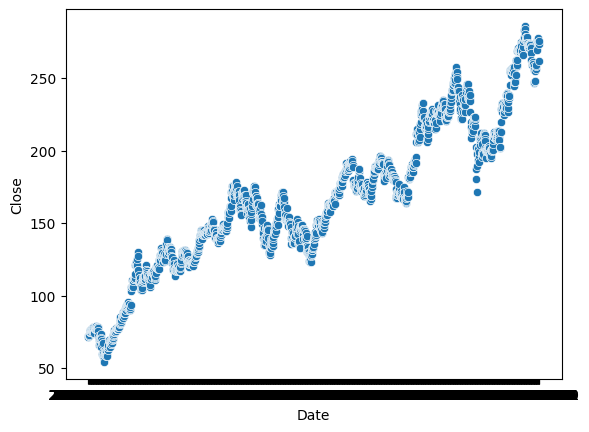

In [5]:
sns.scatterplot(x='Date', y='Close', data=df)

In [6]:
# renommer les colonnes
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
data['ds'] = pd.to_datetime(data['ds'])
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [7]:
model = NeuralProphet(
    n_lags=60, 
    n_forecasts=1,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    batch_size=32,
    epochs=100,
    learning_rate=0.001,
)

# Ajouter les jours féries 
model.add_country_holidays(country_name='US')

In [8]:
# split train et test
df_train,df_test = model.split_df(data,freq='D',valid_p=0.2)
print("----------DEBUT D'ENTRAINEMENT-----------")
metrics = model.fit(df_train, validation_df=df_test, freq='D')
print("----------FIN D'ENTRAINEMENT-----------")

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\pr

----------DEBUT D'ENTRAINEMENT-----------
Epoch 1:   1%|          | 1/100 [00:00<00:01, 62.79it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 12. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [01:44<?, ?it/s, v_num=3, MAE_val=5.760, RMSE_val=7.550, Loss_val=0.00328, RegLoss_val=0.000, train_loss=0.000891, reg_loss=0.000, MAE=3.350, RMSE=4.360, Loss=0.000889, RegLoss=0.000]
----------FIN D'ENTRAINEMENT-----------


In [9]:
# evaluation du modèle
forecast_train = model.predict(df_train)
# suppression des na dus au lag de 60
mask = forecast_train['yhat1'].notna()
y_true = forecast_train.loc[mask, 'y']
y_pred = forecast_train.loc[mask, 'yhat1']
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae:.2f}')
# print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2:.2f}')

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 24.92it/s]
MAE: 3.35
R2: 0.99


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 33.94it/s]


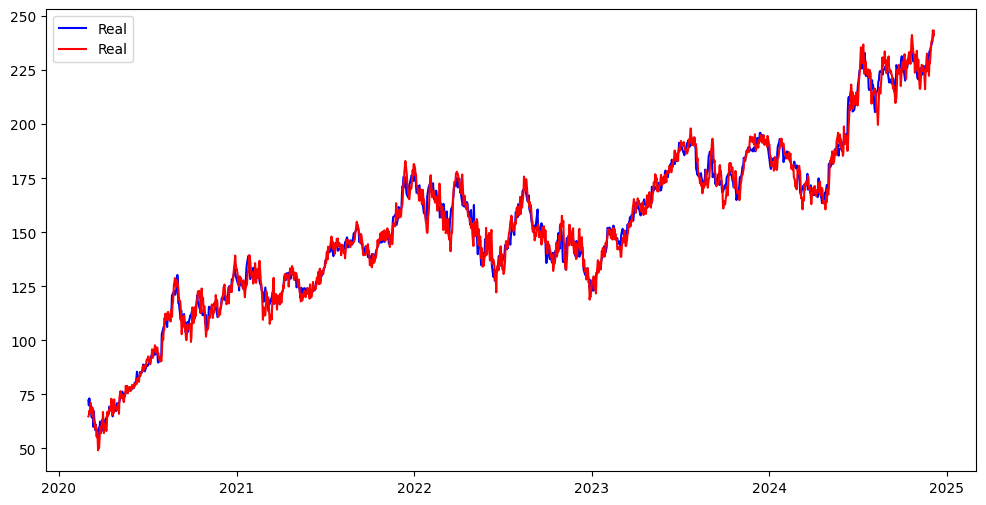

In [10]:
# visualisation des courbes
forecast_train = model.predict(df_train)
forecast_train_filtered = forecast_train.dropna(subset=['yhat1'])
plt.figure(figsize=(12, 6))
plt.plot(forecast_train_filtered['ds'], forecast_train_filtered['y'], label='Real', color='blue')
plt.plot(forecast_train_filtered['ds'], forecast_train_filtered['yhat1'], label='Real', color='red')
plt.legend()
plt.show()

In [11]:
data.tail()

,ds,y
1532,2026-02-06,277.859985
1533,2026-02-09,274.619995
1534,2026-02-10,273.679993
1535,2026-02-11,275.500000
1536,2026-02-12,261.730011


In [12]:
# prediction de l'action apple pour un jour
future = model.make_future_dataframe(data, periods=1, n_historic_predictions=True)
forecast_future = model.predict(future)
forecast_future.tail()

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 38.72it/s]


,ds,y,yhat1,ar1,trend,season_yearly,season_weekly,season_daily,events_additive,event_Christmas Day,...,event_Juneteenth National Independence Day (observed),event_Labor Day,event_Martin Luther King Jr. Day,event_Memorial Day,event_New Year's Day,event_New Year's Day (observed),event_Thanksgiving Day,event_Veterans Day,event_Veterans Day (observed),event_Washington's Birthday
2230,2026-02-09,274.619995,278.612305,207.505981,-23.703812,80.371605,-18.646601,33.085140,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2231,2026-02-10,273.679993,279.041565,270.673706,-23.764091,74.129471,-75.561859,33.564320,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2232,2026-02-11,275.500000,276.752655,181.615463,-23.824371,67.758835,18.162317,33.040413,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2233,2026-02-12,261.730011,276.860657,91.358505,-23.884644,61.274048,115.009262,33.103470,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2234,2026-02-13,NaN,273.758453,330.948578,-23.944923,54.702747,-121.407845,33.459900,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Prediction test

current_data = data[data['ds'] <= '2026-02-12']
predictions_list = []


for i in range(50):
    
    future = model.make_future_dataframe(current_data, periods=1, n_historic_predictions=False)

    forecast = model.predict(future)

    next_date = forecast.iloc[-1]['ds']
    next_pred = forecast.iloc[-1]['yhat1']

    predictions_list.append({'Date': next_date, 'Prix Prédit': next_pred})

    new_row = pd.DataFrame({'ds': [next_date], 'y': [next_pred]})
    current_data = pd.concat([current_data, new_row], ignore_index=True)



WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 62.13it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 37.37it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 42.97it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 56.59it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 59.42it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 69.54it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 60.09it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 66.08it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 45.65it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 60.11it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 78.62it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 50.16it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 39.52it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 51.73it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas 

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 60.22it/s] 


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 49.27it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 55.63it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas 

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 63.02it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 47.70it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 49.59it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 25.44it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 62.92it/s] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 53.02it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 39.49it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 52.23it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 56.80it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 52.02it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)



WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas 

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 66.09it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 44.85it/s]


WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 39.77it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 39.35it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 40.16it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 49.85it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 46.26it/s] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 44.12it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 39.95it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 40.82it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 49.42it/s] 

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 46.71it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 81.27it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 54.41it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 41.61it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 35.10it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 41.74it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 36.53it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 36.44it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 61.47it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 36.06it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 38.27it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\LoickFeze\Downloads\Cours_M2\Open_CV\projet\.projet\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 46.96it/s]


In [14]:
# 3. Affichage de la table
df_table = pd.DataFrame(predictions_list)
print(df_table)

         Date  Prix Prédit
0  2026-02-13   273.758453
1  2026-02-14   269.764496
2  2026-02-15   271.528046
3  2026-02-16   265.249146
4  2026-02-17   273.419098
5  2026-02-18   270.468933
6  2026-02-19   270.766876
7  2026-02-20   272.023010
8  2026-02-21   277.605042
9  2026-02-22   274.292542
10 2026-02-23   280.967377
11 2026-02-24   277.342865
12 2026-02-25   281.314545
13 2026-02-26   280.383759
14 2026-02-27   288.649506
15 2026-02-28   278.859009
16 2026-03-01   281.514709
17 2026-03-02   279.329620
18 2026-03-03   277.334412
19 2026-03-04   277.753723
20 2026-03-05   278.480255
21 2026-03-06   274.939423
22 2026-03-07   272.076599
23 2026-03-08   271.218811
24 2026-03-09   269.377075
25 2026-03-10   261.284363
26 2026-03-11   264.718750
27 2026-03-12   257.918884
28 2026-03-13   251.031036
29 2026-03-14   247.964386
30 2026-03-15   243.214905
31 2026-03-16   241.108337
32 2026-03-17   241.762726
33 2026-03-18   244.156128
34 2026-03-19   236.083099
35 2026-03-20   236.919098
3

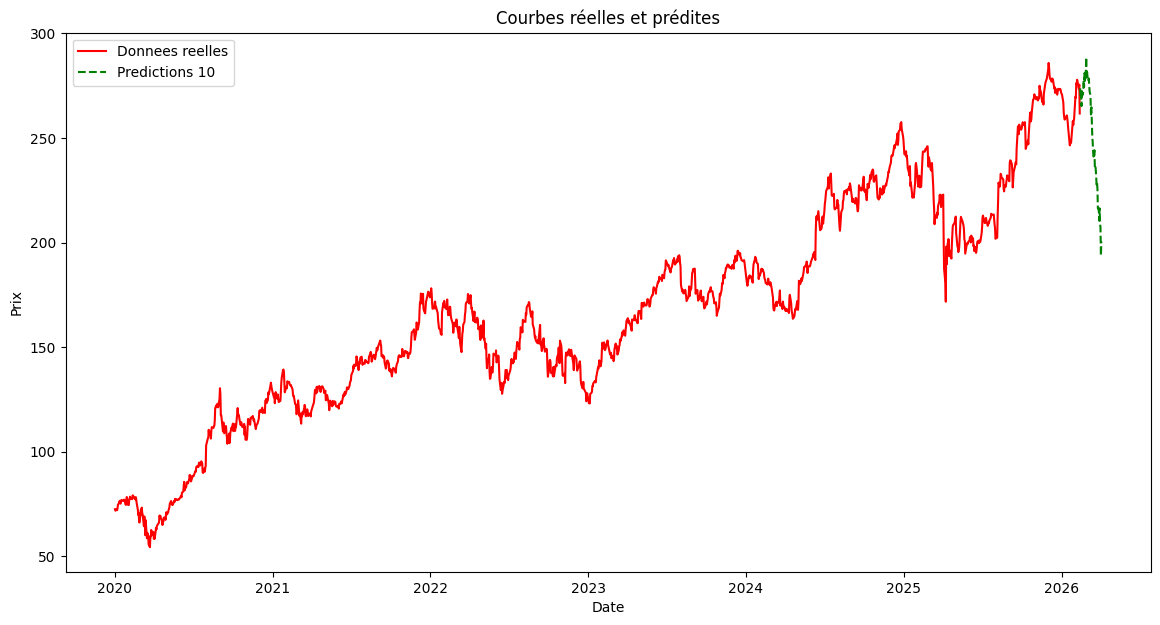

In [15]:
# visuel données réelles et données prédites
df_actual = data[data['ds'] <= '2026-02-12']

plt.figure(figsize=(14, 7))
# reel en rouge
plt.plot(df_actual['ds'],df_actual['y'],color='red', label = 'Donnees reelles')
# predictions en vert
plt.plot(df_table['Date'], df_table['Prix Prédit'], color='green', label='Predictions 10', linestyle='--')
plt.title('Courbes réelles et prédites')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

In [16]:
import torch

torch.save(model.model.state_dict(), "neural.pth")


In [18]:
torch.save(model, 'apple_neural.pt')